## Problem Statement

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# To get the descriptive statistics

df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
# Getting the information about the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

No null values are there for any of the features.

In [6]:
# Separate out the independant variables from the dependant variable for One Hot Encoding

X = df.drop('Taxable.Income', axis = 1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [7]:
# Applying One Hot Encoding on the independant variables

X = pd.get_dummies(X)
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [8]:
y = pd.cut(df['Taxable.Income'], bins = [0, 30000, 100000], labels = ['Risky','Good'])
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [9]:
y.value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

The given dataset is imbalanced one. We need to use sampling technique to handle it.

In [10]:
# Splitting the data into training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Building the Decision Tree Classifier Model

In [11]:
# Model building without resampling with 'entropy' criterion

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 42)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [12]:
y_pred_test = model.predict(X_test)

In [13]:
print('Accuracy score for the test data set: ', accuracy_score(y_test, y_pred_test))

Accuracy score for the test data set:  0.7944444444444444


In [14]:
print('Confusion Matrix \n \n', confusion_matrix(y_test, y_pred_test))

Confusion Matrix 
 
 [[143   0]
 [ 37   0]]


In [15]:
print('Classification Report \n \n', classification_report(y_test, y_pred_test))

Classification Report 
 
               precision    recall  f1-score   support

        Good       0.79      1.00      0.89       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



In [16]:
# Model building without resampling with 'gini' criterion

model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [17]:
y_pred_test = model.predict(X_test)

In [18]:
print('Accuracy score for the test data set: ', accuracy_score(y_test, y_pred_test))

Accuracy score for the test data set:  0.7944444444444444


In [19]:
print('Confusion Matrix \n \n', confusion_matrix(y_test, y_pred_test))

Confusion Matrix 
 
 [[143   0]
 [ 37   0]]


In [20]:
print('Classification Report \n \n', classification_report(y_test, y_pred_test))

Classification Report 
 
               precision    recall  f1-score   support

        Good       0.79      1.00      0.89       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



In [21]:
# Using the oversampling for getting the balanced data set

from imblearn.over_sampling import SMOTE

In [22]:
resampled = SMOTE()

In [23]:
X_resampled, y_resampled = resampled.fit_resample(X,y)

In [24]:
y_resampled.value_counts()

Risky    476
Good     476
Name: Taxable.Income, dtype: int64

In [25]:
y.value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [26]:
X.shape

(600, 9)

In [27]:
X_resampled.shape

(952, 9)

In [28]:
y.shape

(600,)

In [29]:
y_resampled.shape

(952,)

In [30]:
# Building model with 'gini' criterion with over-sampling

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [31]:
model1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state = 42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [32]:
y_pred_test = model.predict(X_test)

In [33]:
print('Accuracy score for the test data set: ', accuracy_score(y_test, y_pred_test))

Accuracy score for the test data set:  0.6678321678321678


In [34]:
print('Confusion Matrix \n \n', confusion_matrix(y_test, y_pred_test))

Confusion Matrix 
 
 [[ 73  73]
 [ 22 118]]


In [35]:
print('Classification Report \n \n', classification_report(y_test, y_pred_test))

Classification Report 
 
               precision    recall  f1-score   support

        Good       0.77      0.50      0.61       146
       Risky       0.62      0.84      0.71       140

    accuracy                           0.67       286
   macro avg       0.69      0.67      0.66       286
weighted avg       0.69      0.67      0.66       286



With oversampling there is a reduction in the accuracy of the model.

In [36]:
# Plotting a Decision Tree for the simple Decision Tree Classifier 

model1 = DecisionTreeClassifier(random_state = 42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred_test = model1.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred_test)

0.8006993006993007

[Text(0.5857799899193549, 0.9666666666666667, 'X[2] <= 0.5\ngini = 0.5\nsamples = 666\nvalue = [330, 336]'),
 Text(0.3563508064516129, 0.9, 'X[3] <= 0.5\ngini = 0.481\nsamples = 411\nvalue = [165, 246]'),
 Text(0.3482862903225806, 0.8333333333333334, 'gini = 0.0\nsamples = 116\nvalue = [0, 116]'),
 Text(0.3644153225806452, 0.8333333333333334, 'X[6] <= 0.5\ngini = 0.493\nsamples = 295\nvalue = [165, 130]'),
 Text(0.18649193548387097, 0.7666666666666667, 'X[4] <= 0.5\ngini = 0.499\nsamples = 204\nvalue = [97, 107]'),
 Text(0.07963709677419355, 0.7, 'X[5] <= 0.5\ngini = 0.47\nsamples = 138\nvalue = [52, 86]'),
 Text(0.0715725806451613, 0.6333333333333333, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]'),
 Text(0.08770161290322581, 0.6333333333333333, 'X[0] <= 71438.0\ngini = 0.472\nsamples = 84\nvalue = [52, 32]'),
 Text(0.024193548387096774, 0.5666666666666667, 'X[1] <= 11.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.016129032258064516, 0.5, 'X[1] <= 10.5\ngini = 0.375\nsamples 

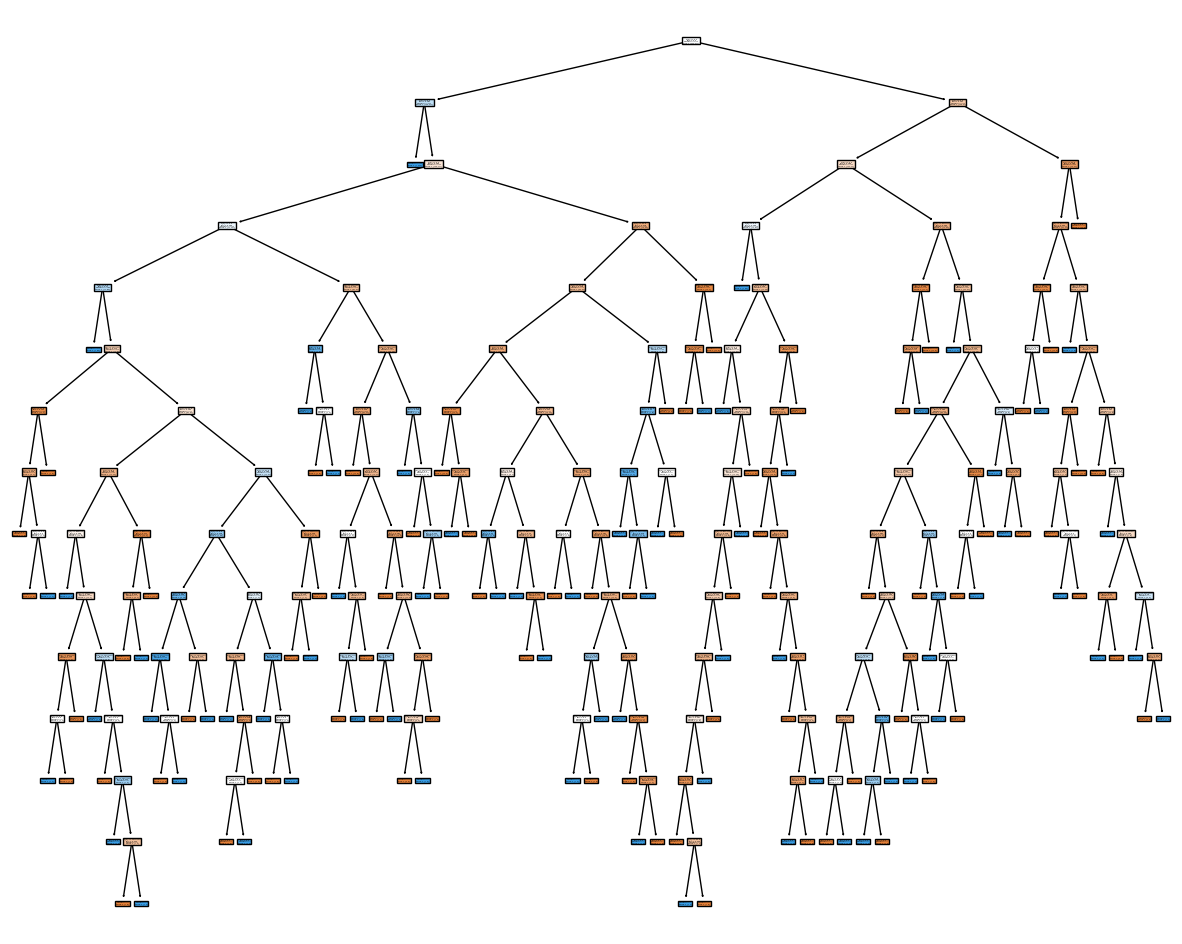

In [39]:
plt.figure(figsize = (15,12))
plot_tree(model1, filled = True)

We need to use Prunning technique here

In [40]:
prun = model.cost_complexity_pruning_path(X_train,y_train)
prun

{'ccp_alphas': array([0.        , 0.00189252, 0.00876231, 0.01395676, 0.05336235]),
 'impurities': array([0.35986082, 0.36175334, 0.37927795, 0.39323471, 0.49995942])}

In [41]:
dtcs = []

for ccp in prun.ccp_alphas:
    dtc1 = DecisionTreeClassifier(random_state = 42, ccp_alpha = ccp)
    dtc1.fit(X_train,y_train)
    dtcs.append(dtc1)

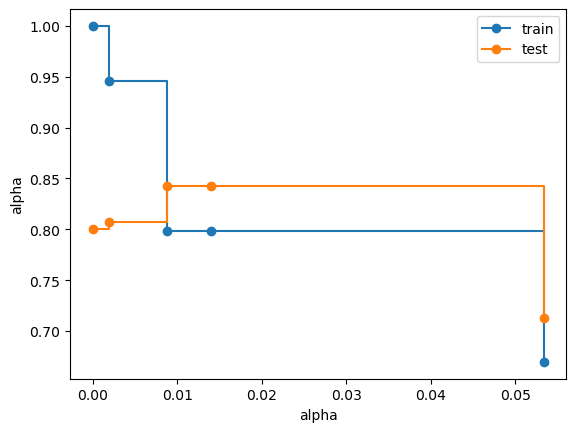

In [42]:
train_score = [dtcc.score(X_train,y_train) for dtcc in dtcs]
test_score = [dtcc.score(X_test,y_test) for dtcc in dtcs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('alpha')
ax.plot(prun.ccp_alphas, train_score, label = 'train', drawstyle = 'steps-post', marker = 'o' )
ax.plot(prun.ccp_alphas, test_score, label = 'test', drawstyle = 'steps-post', marker = 'o' )
ax.legend()
plt.show()

In [43]:
# Selecting the point of convergence from the above graph

model_con = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.01)
model_con.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [44]:
y_pred_test = model_con.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred_test)

0.8426573426573427

With the use of Prunning, there is an imporovement in the accuracy of the model

In [46]:
confusion_matrix(y_test,y_pred_test)

array([[146,   0],
       [ 45,  95]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

        Good       0.76      1.00      0.87       146
       Risky       1.00      0.68      0.81       140

    accuracy                           0.84       286
   macro avg       0.88      0.84      0.84       286
weighted avg       0.88      0.84      0.84       286



[Text(0.5454545454545454, 0.9166666666666666, 'X[2] <= 0.5\ngini = 0.5\nsamples = 666\nvalue = [330, 336]'),
 Text(0.2727272727272727, 0.75, 'X[3] <= 0.5\ngini = 0.481\nsamples = 411\nvalue = [165, 246]'),
 Text(0.18181818181818182, 0.5833333333333334, 'gini = 0.0\nsamples = 116\nvalue = [0, 116]'),
 Text(0.36363636363636365, 0.5833333333333334, 'X[6] <= 0.5\ngini = 0.493\nsamples = 295\nvalue = [165, 130]'),
 Text(0.2727272727272727, 0.4166666666666667, 'X[4] <= 0.5\ngini = 0.499\nsamples = 204\nvalue = [97, 107]'),
 Text(0.18181818181818182, 0.25, 'X[5] <= 0.5\ngini = 0.47\nsamples = 138\nvalue = [52, 86]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.472\nsamples = 84\nvalue = [52, 32]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.434\nsamples = 66\nvalue = [45, 21]'),
 Text(0.45454545454545453, 0.4166666666666667, 'gini = 0.378\nsamples = 91\nvalue = [68, 23]'),
 Text(0.818181

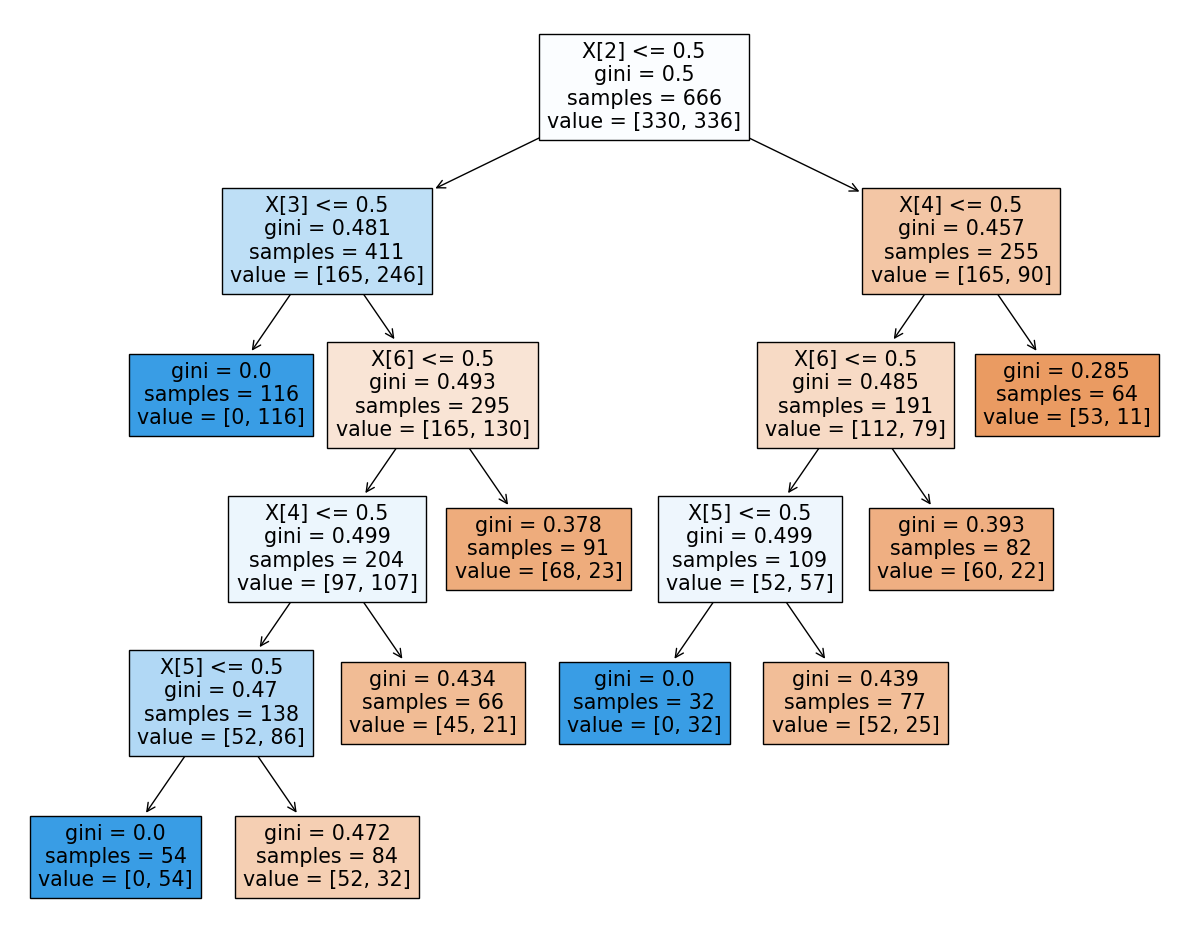

In [49]:
# Plotting the decision tree for the above model

plt.figure(figsize= (15,12))
plot_tree(model_con, filled = True)

In [50]:
# Using Bagging Technique

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [51]:
model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators= 100, max_samples= 0.8, oob_score= True,
        random_state= 42)

In [52]:
model_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=42)

In [53]:
y_pred_test = model_bagging.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred_test)

0.8496503496503497

In [55]:
confusion_matrix(y_test,y_pred_test)

array([[127,  19],
       [ 24, 116]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

        Good       0.84      0.87      0.86       146
       Risky       0.86      0.83      0.84       140

    accuracy                           0.85       286
   macro avg       0.85      0.85      0.85       286
weighted avg       0.85      0.85      0.85       286



In [57]:
scores = cross_val_score(model_bagging, X_resampled, y_resampled, cv= 10)

In [58]:
scores

array([0.53125   , 0.625     , 0.68421053, 0.95789474, 0.88421053,
       0.91578947, 0.92631579, 0.94736842, 0.90526316, 0.98947368])

In [59]:
np.mean(scores)

0.8366776315789475